In [3]:
import pandas as pd

### Load the data 

In [5]:
data = pd.read_csv('sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [8]:
data.info()#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
data.describe()# This gives the descriptive statistics.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [21]:
numerical_columns=data._get_numeric_data() # it is used to get the numeric type of data 
numerical_columns
#numerical_columns.columns # to get the only columns names

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [23]:
numerical_columns.mean() # to get the mean

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [24]:
numerical_columns.median() # to get the median

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [26]:
numerical_columns.mode().iloc[0] # to get the most freqent value

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [28]:
numerical_columns.std() # to get the standard deviation

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

###### Mean > Median for most variables so,Data is right-skewed (few very large values)
###### Large Std. Dev for prices and sales values so high variability


### Data Visualization

##### To visualize the distribution and relationship of numerical and categorical variables in the dataset

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 	Plot histograms for each numerical column

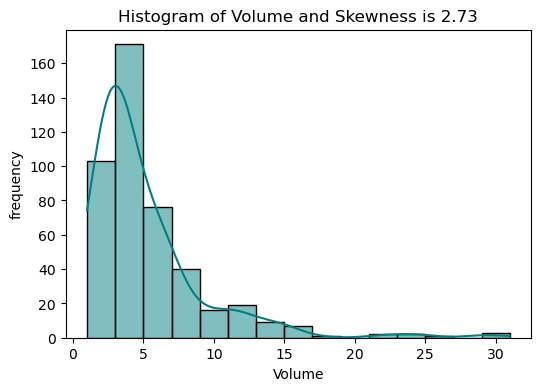

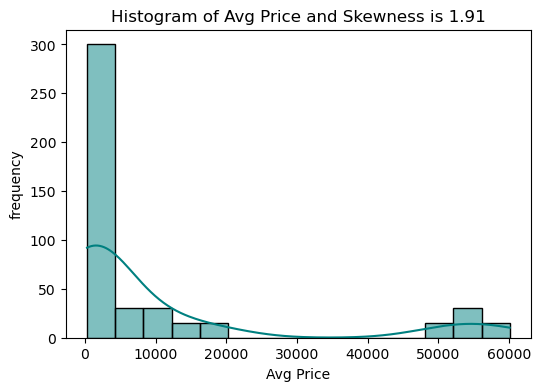

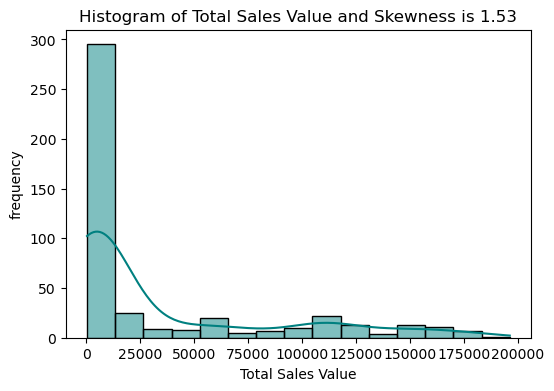

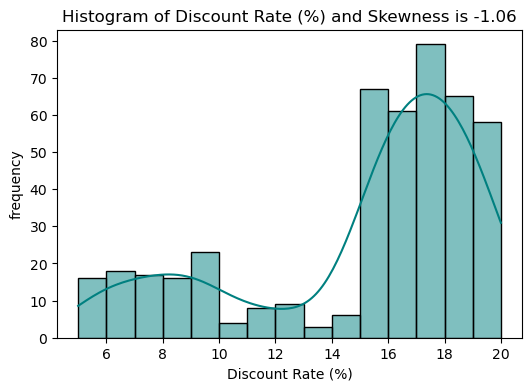

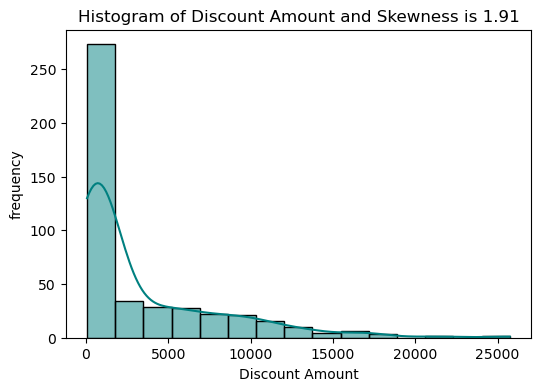

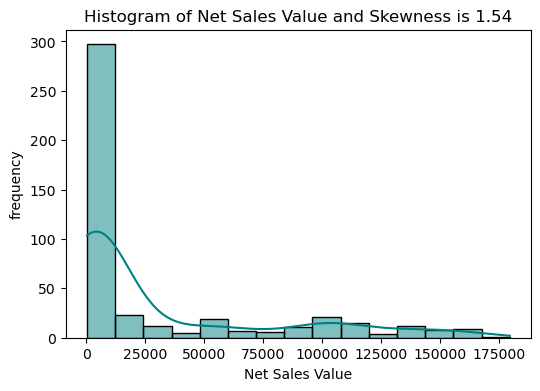

In [36]:
for col in numerical_columns.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numerical_columns[col],bins=15,color='teal',kde=True,edgecolor='black')# kde is helps in visualize the skewness more clearly
    plt.title(f'Histogram of {col} and Skewness is {np.round(data[col].skew(),2)}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

##### Here most numerical variables are right-skewed, indicating the presence of a few outliers.
##### Discount Rate (%) is comparatively normal, suggesting consistent discounting.
##### These patterns indicate that data normalization may be useful before building models.

#### 	Create boxplots for numerical variables to identify outliers and the interquartile range

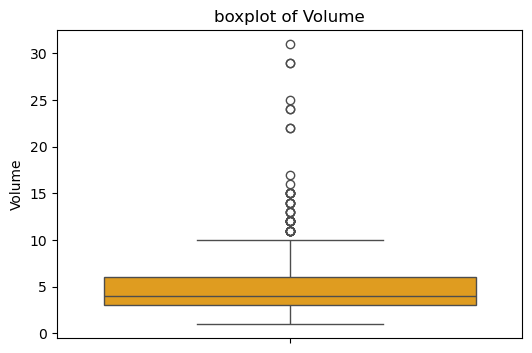

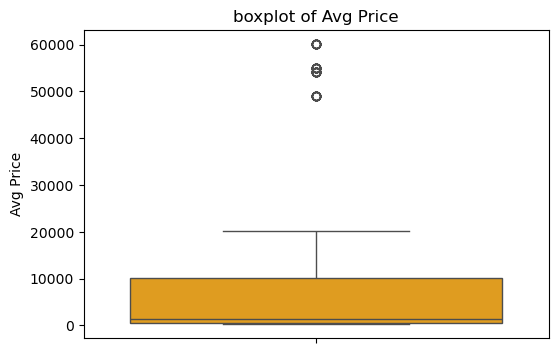

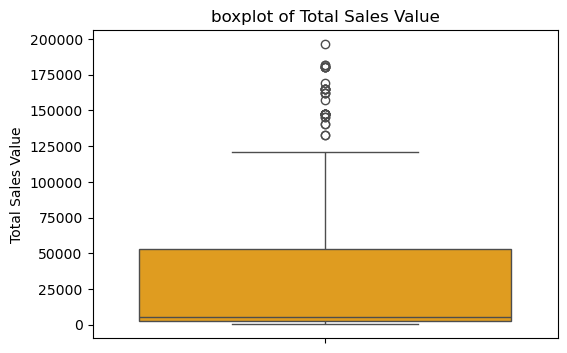

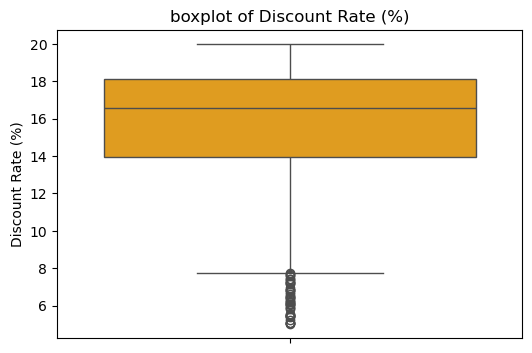

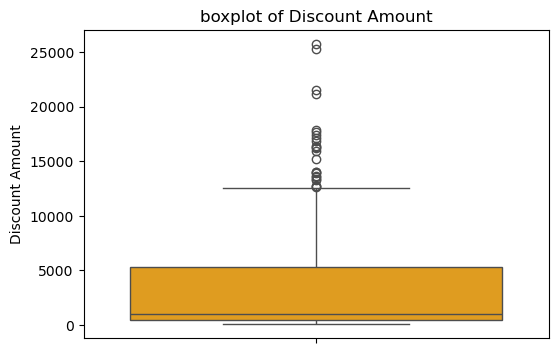

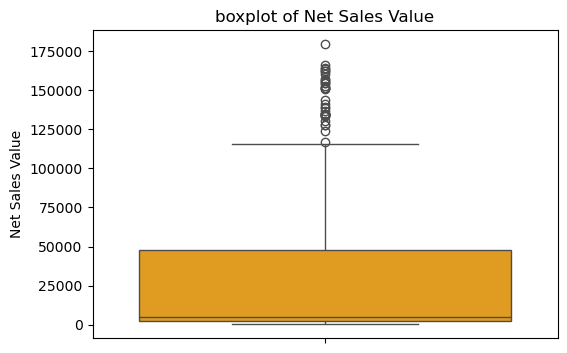


 IQR and Outlier Summary:

                        Q1        Q3       IQR  Lower_Bound  Upper_Bound  \
Volume                3.00      6.00      3.00        -1.50        10.50   
Avg Price           465.00  10100.00   9635.00    -13987.50     24552.50   
Total Sales Value  2700.00  53200.00  50500.00    -73050.00    128950.00   
Discount Rate (%)    13.97     18.11      4.15         7.74        24.34   
Discount Amount     460.46   5316.50   4856.04     -6823.59     12600.55   
Net Sales Value    2202.21  47847.91  45645.70    -66266.35    116316.47   

                   Outlier_Count  
Volume                        44  
Avg Price                     60  
Total Sales Value             36  
Discount Rate (%)             45  
Discount Amount               24  
Net Sales Value               35  


In [38]:
for col in numerical_columns.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=numerical_columns[col],color='orange')
    plt.title(f'boxplot of {col}')
    plt.show()

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outlier_count = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).sum()

# Combine into one table
iqr_table = pd.DataFrame({
    'Q1': Q1.round(2),
    'Q3': Q3.round(2),
    'IQR': IQR.round(2),
    'Lower_Bound': lower_bound.round(2),
    'Upper_Bound': upper_bound.round(2),
    'Outlier_Count': outlier_count
})

print("\n IQR and Outlier Summary:\n")
print(iqr_table)

#### Bar Chart Analysis for Categorical Column

In [42]:
categorical_column= data.drop(data._get_numeric_data(),axis = 1)
categorical_column.columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

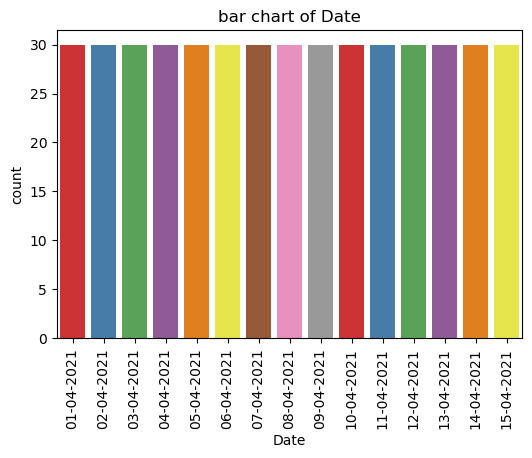

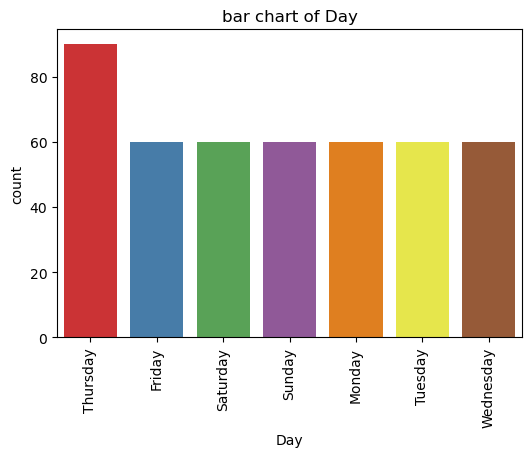

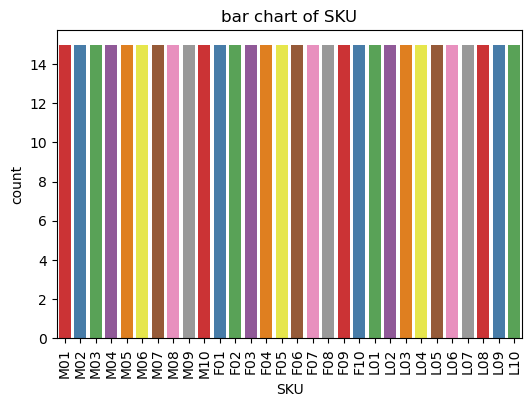

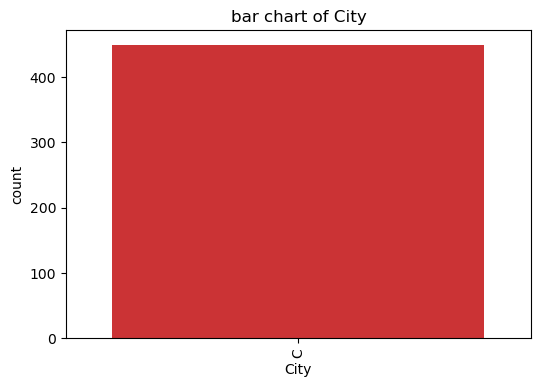

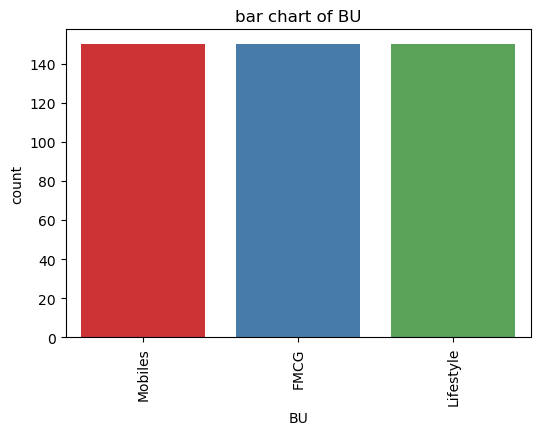

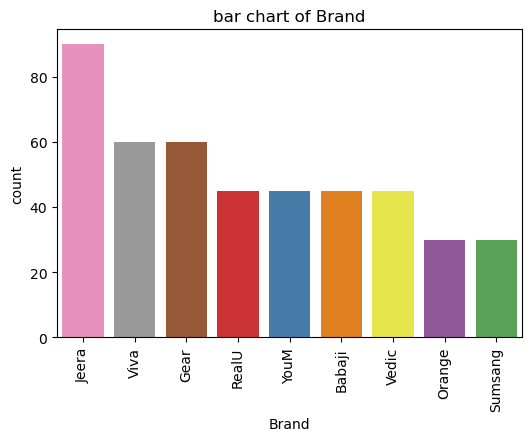

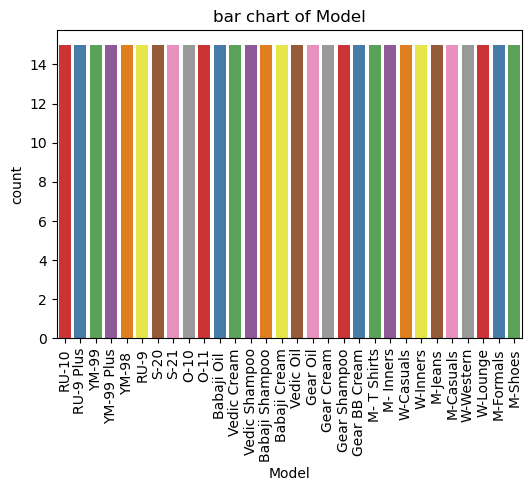

In [44]:
for col in categorical_column:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col,data=data,hue=col,palette='Set1',order=data[col].value_counts().index,legend=False)
    plt.title(f'bar chart of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

In [46]:
for col in categorical_column:
    print(f'\n insights for {col}')
    print(data[col].value_counts())
    top_categorical_column = data[col].value_counts().idxmax()
    print(f'most frequent categort = {top_categorical_column} ({data[col].value_counts().max()} counts)')
    print(f'number of unique categories = {data[col].nunique()}')



 insights for Date
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
most frequent categort = 01-04-2021 (30 counts)
number of unique categories = 15

 insights for Day
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
most frequent categort = Thursday (90 counts)
number of unique categories = 7

 insights for SKU
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: count, dtype: int64
most frequent categort = 

 ### Standardization of Numerical Variables
    Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
    (z-score normalization).
	Standardize the numerical columns by using the formula: z=x-mu/sigma


In [49]:
data_standardize = data.copy()
data_standardize.head()
for col in numerical_columns:
    mean = data[col].mean()
    std = data[col].std()
    data_standardize[col] = (data[col] - mean) / std 

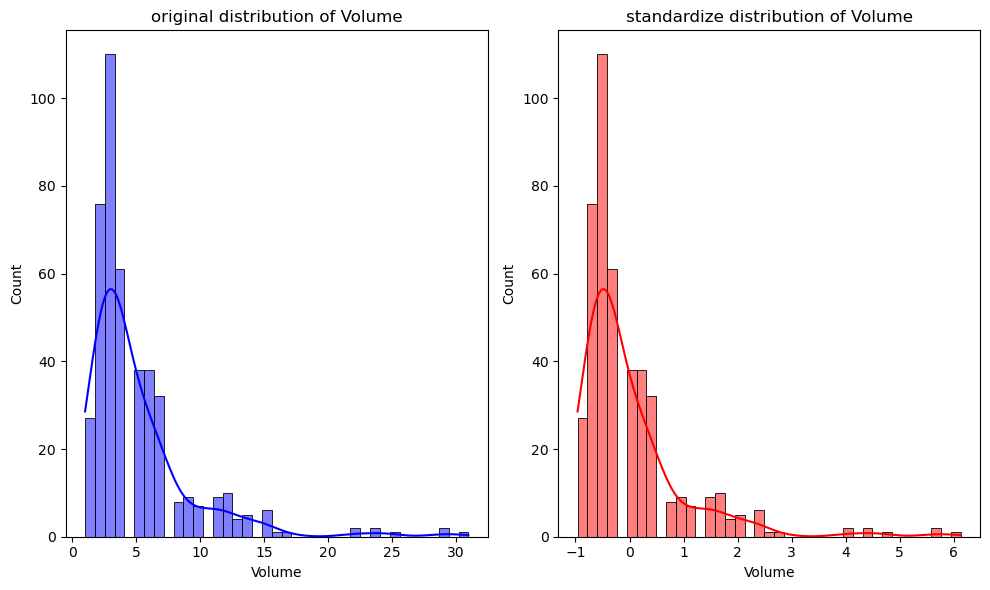

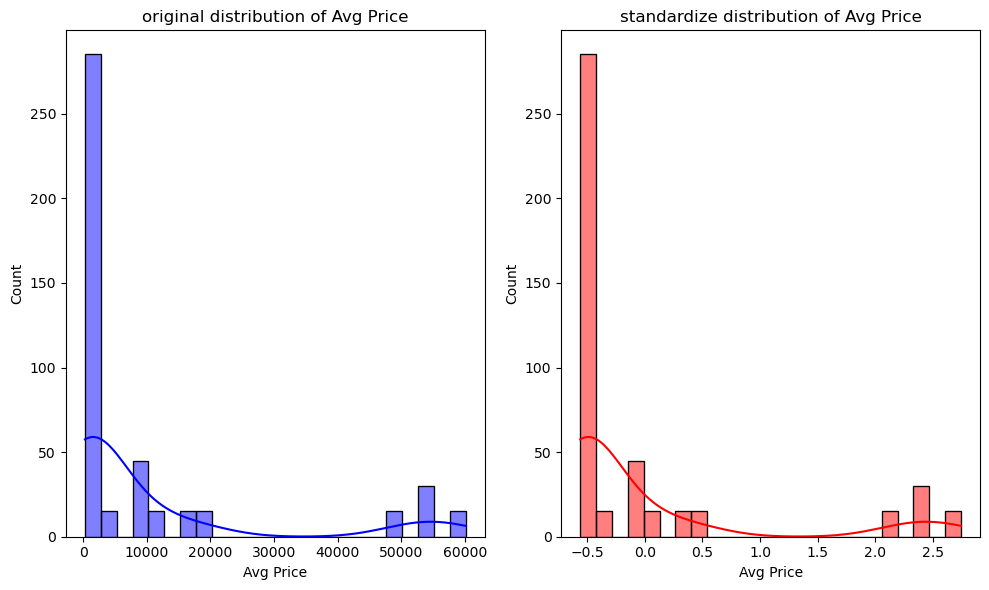

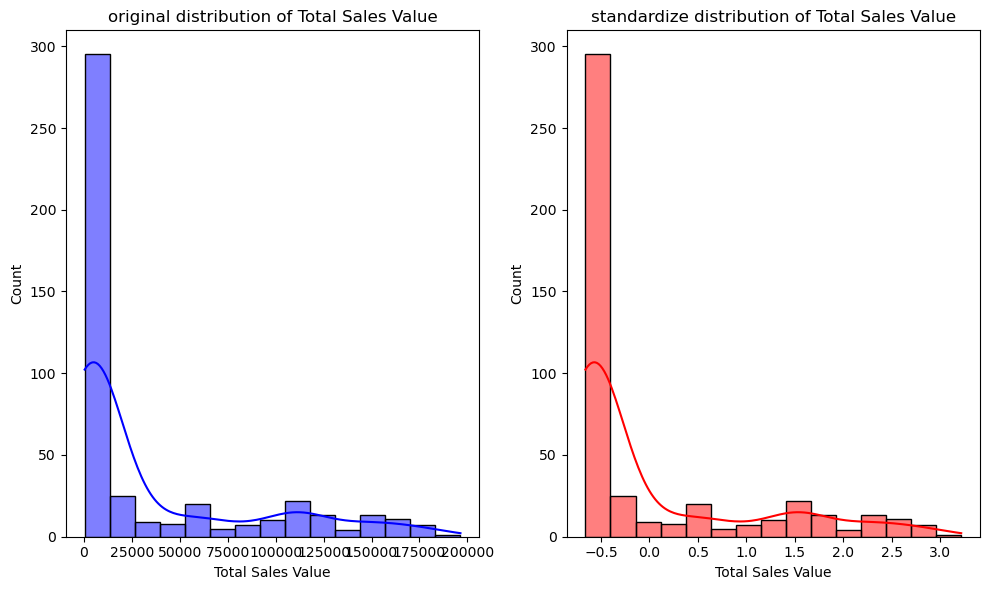

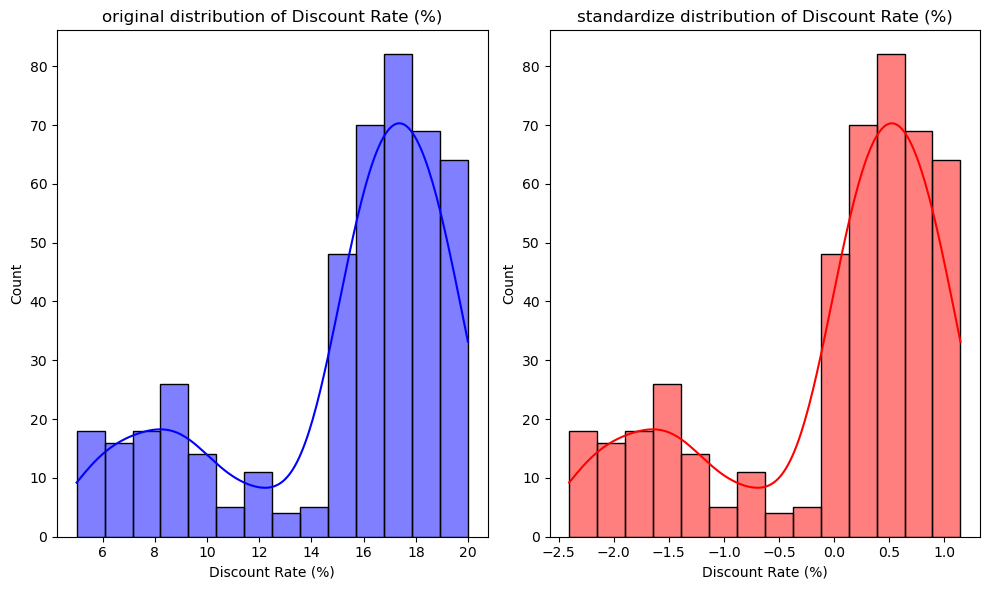

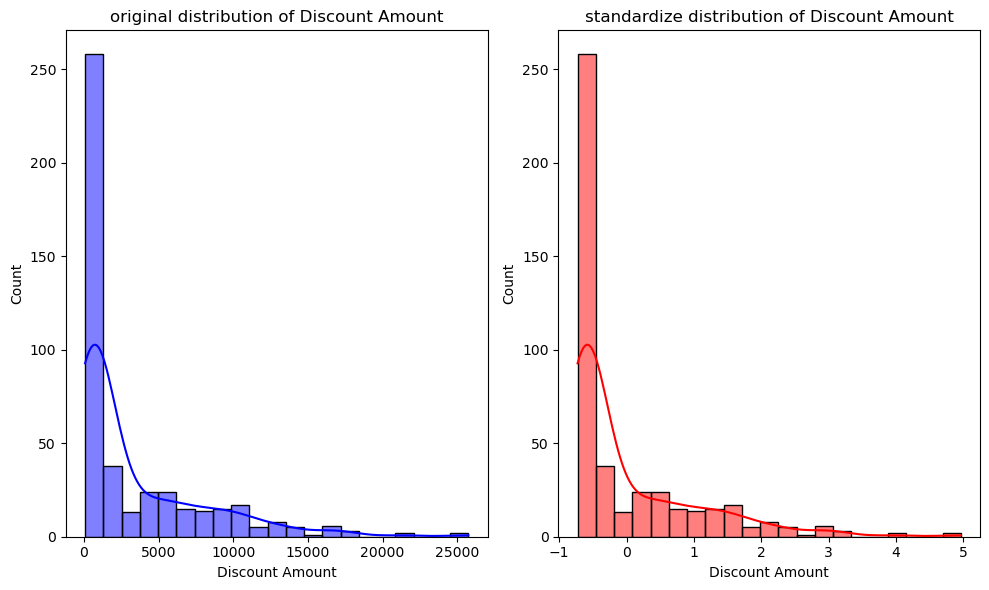

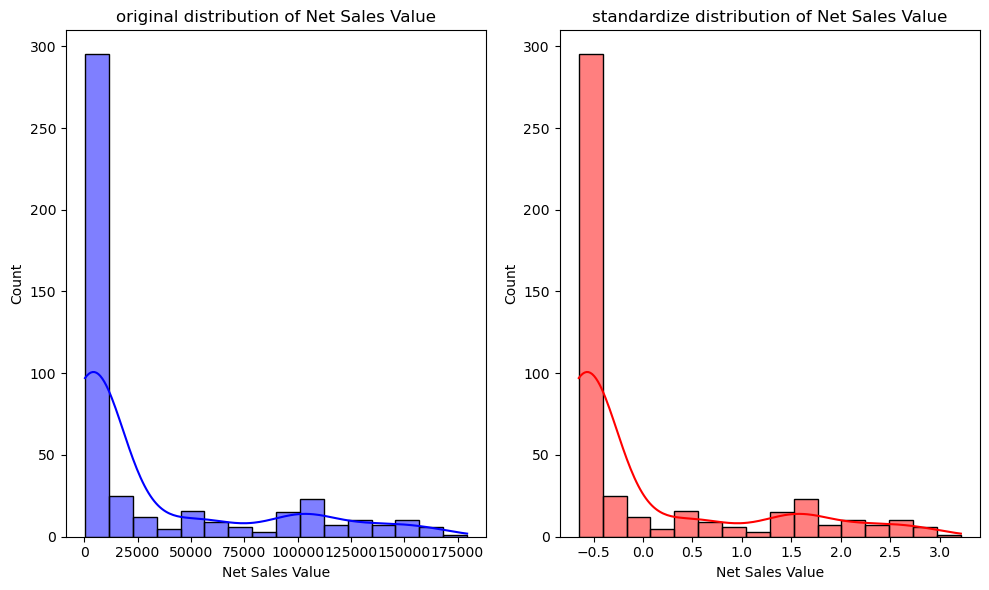

In [54]:
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    
    #original distrbution
    plt.subplot(1,2,1)
    sns.histplot(data[col],kde=True,color='blue')
    plt.title(f'original distribution of {col}')

    #standardize distribution
    plt.subplot(1,2,2)
    sns.histplot(data_standardize[col],kde=True,color='red')
    plt.title(f'standardize distribution of {col}')

    plt.tight_layout()
    plt.show()    

In [56]:
print('\n before standardize (mean,std)')
print(data[numerical_columns.columns].agg(['mean','std']))
 
print('\n after standardize (mean,std)')
print(data_standardize[numerical_columns.columns].agg(['mean','std']))


 before standardize (mean,std)
        Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean  5.066667  10453.433333       33812.835556          15.155242   
std   4.231602  18079.904840       50535.074173           4.220602   

      Discount Amount  Net Sales Value  
mean      3346.499424     30466.336131  
std       4509.902963     46358.656624  

 after standardize (mean,std)
            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean  4.934325e-17  3.947460e-17       1.184238e-17      -3.552714e-17   
std   1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   

      Discount Amount  Net Sales Value  
mean    -5.921189e-17     3.947460e-18  
std      1.000000e+00     1.000000e+00  


### Conversion of Categorical Data into Dummy Variable
##### Objective: To transform categorical variables into a format that can be provided to ML algorithms.
##### Discuss the need for converting categorical data into dummy variables (one-hot encoding).
##### Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
##### Display a portion of the transformed dataset.

In [58]:
categorical_column1 = categorical_column.columns
data_dummies = pd.get_dummies(data,categorical_column1)
data_dummies.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
